In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydeck as pdk

In [2]:
df = pd.read_csv('./MyEBirdData.csv')

df.head()

Submission ID                   Common Name         Scientific Name  \
0    S108633122  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
1    S143553475  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
2    S143499356  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
3    S143567135  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
4     S96899294                    Snow Goose      Anser caerulescens   

   Taxonomic Order  Count State/Province     County Location ID  \
0              233     21          US-KS     Barton    L9439284   
1              233      2          US-TX   Brazoria    L1575305   
2              233      2          US-TX   Brazoria   L18505011   
3              233     11          US-TX  Galveston     L284163   
4              256    100          US-MO       Holt     L170028   

                                            Location   Latitude  ...  \
0                                     Wolf Pond Park  38.353890  ...   
1  Brazoria NWR--Auto Tour Loop and Discovery Center  29.059984  ...   
2                      Brazoria NWR—Big Slough Trail  29.062325  ...   
3                Galveston--Lafitte's Cove (UTC 068)  29.216901  ...   
4                                   Loess Bluffs NWR  40.068893  ...   

                     Protocol Duration (Min) All Obs Reported  \
0  eBird - Casual Observation            NaN                0   
1     eBird - Traveling Count          145.0                0   
2     eBird - Traveling Count          108.0                0   
3     eBird - Traveling Count           28.0                0   
4     eBird - Traveling Count          320.0                1   

  Distance Traveled (km)  Area Covered (ha)  Number of Observers  \
0                    NaN                NaN                    4   
1                 15.498                NaN                    2   
2                 15.144                NaN                    2   
3                  1.078                NaN                    2   
4                 16.592                NaN                    4   

   Breeding Code  Observation Details  Checklist Comments  ML Catalog Numbers  
0            NaN                  NaN                 NaN                 NaN  
1            NaN                  NaN                 NaN                 NaN  
2            NaN                  NaN                 NaN                 NaN  
3            NaN                  NaN                 NaN                 NaN  
4            NaN                  NaN                 NaN                 NaN  

[5 rows x 23 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Greater White-fronted Goose'),
  Text(1, 0, 'Red-winged Blackbird'),
  Text(2, 0, 'Northern Pintail'),
  Text(3, 0, 'Snow Goose'),
  Text(4, 0, 'Canada Goose'),
  Text(5, 0, 'American Coot'),
  Text(6, 0, 'Trumpeter Swan'),
  Text(7, 0, 'Blue-winged Teal'),
  Text(8, 0, 'White-faced Ibis'),
  Text(9, 0, 'Northern Shoveler')])

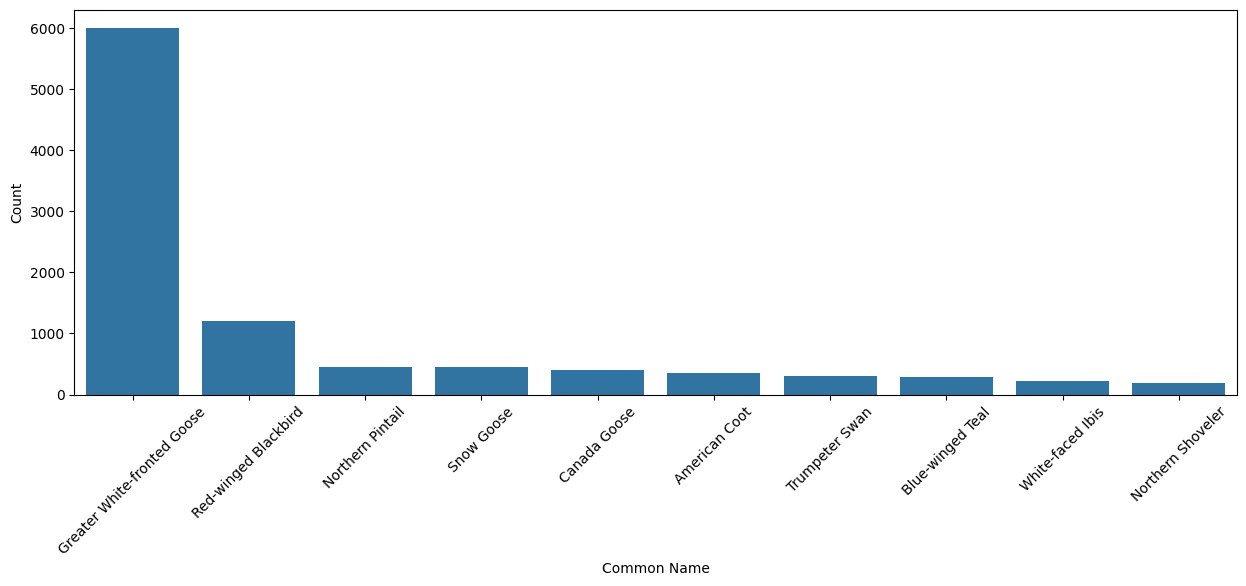

In [3]:
top_ten_by_count = df[['Common Name', 'Count']].groupby('Common Name').sum().nlargest(10, 'Count')
top_ten_by_count
plt.figure(figsize=(15,5))
sns.barplot(data=top_ten_by_count, x='Common Name', y='Count')
plt.xticks(rotation=45)

In [ ]:
df.head()

Submission ID                   Common Name         Scientific Name  \
0    S108633122  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
1    S143553475  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
2    S143499356  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
3    S143567135  Black-bellied Whistling-Duck  Dendrocygna autumnalis   
4     S96899294                    Snow Goose      Anser caerulescens   

   Taxonomic Order  Count State/Province     County Location ID  \
0              233     21          US-KS     Barton    L9439284   
1              233      2          US-TX   Brazoria    L1575305   
2              233      2          US-TX   Brazoria   L18505011   
3              233     11          US-TX  Galveston     L284163   
4              256    100          US-MO       Holt     L170028   

                                            Location   Latitude  ...  \
0                                     Wolf Pond Park  38.353890  ...   
1  Brazoria NWR--Auto Tour Loop and Discovery Center  29.059984  ...   
2                      Brazoria NWR—Big Slough Trail  29.062325  ...   
3                Galveston--Lafitte's Cove (UTC 068)  29.216901  ...   
4                                   Loess Bluffs NWR  40.068893  ...   

                     Protocol Duration (Min) All Obs Reported  \
0  eBird - Casual Observation            NaN                0   
1     eBird - Traveling Count          145.0                0   
2     eBird - Traveling Count          108.0                0   
3     eBird - Traveling Count           28.0                0   
4     eBird - Traveling Count          320.0                1   

  Distance Traveled (km)  Area Covered (ha)  Number of Observers  \
0                    NaN                NaN                    4   
1                 15.498                NaN                    2   
2                 15.144                NaN                    2   
3                  1.078                NaN                    2   
4                 16.592                NaN                    4   

   Breeding Code  Observation Details  Checklist Comments  ML Catalog Numbers  
0            NaN                  NaN                 NaN                 NaN  
1            NaN                  NaN                 NaN                 NaN  
2            NaN                  NaN                 NaN                 NaN  
3            NaN                  NaN                 NaN                 NaN  
4            NaN                  NaN                 NaN                 NaN  

[5 rows x 23 columns]

In [22]:
label_data = df[['Common Name', 'Latitude', 'Longitude', 'Count', 'Date', 'Location']]

# Group data by long / lat
df['species_and_count'] = df['Common Name'] + ': ' + df['Count'].astype(str)

#label_data= df.groupby(['Longitude', 'Latitude', 'Date']).agg(Species=('species_and_count', lambda x: '<br>'.join(x)), Count=('Count', 'sum')).reset_index()
#label_data


label_data = df.groupby(['Longitude', 'Latitude'])[['Date', 'species_and_count','Count']].apply(
    lambda x: pd.Series({
        'Label': '<h7>' + ''.join(x['Date']) + ':</h7><p style="display:inline-block;margin:1em;margin-top: -20px;">' + '<br>'.join(x['species_and_count']) + '</p>',
        'Count': sum(x['Count'])
    })
).reset_index()


print(label_data['Label'])

0      <h7>2022-10-202022-10-202022-10-20:</h7><p sty...
1      <h7>2022-10-202022-10-202022-10-202022-10-2020...
2      <h7>2022-10-182022-10-182022-10-182022-10-1820...
3      <h7>2022-10-202022-10-202022-10-20:</h7><p sty...
4      <h7>2022-10-162022-10-162022-10-162022-10-1620...
                             ...                        
116    <h7>2024-01-112024-01-112024-01-112024-01-1120...
117    <h7>2024-01-092024-01-092024-01-092024-01-0920...
118    <h7>2024-01-05:</h7><p style="display:inline-b...
119    <h7>2022-03-172022-03-172022-03-17:</h7><p sty...
120    <h7>2022-03-152022-03-152022-03-152022-03-1520...
Name: Label, Length: 121, dtype: object


In [13]:
#label_data = df[['Common Name', 'Latitude', 'Longitude', 'Count', 'Date', 'Location']]

layer = pdk.Layer(
    'ScatterplotLayer',
    label_data,
    get_position=['Longitude','Latitude'],
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=50,
    radius_min_pixels=5,
    radius_max_pixels=20,
    line_width_min_pixels=1,
    get_radius='Count',
    pickable=True,
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0]
)

view_state = pdk.ViewState(
    longitude=-94.6708,
    latitude=38.9822,
    zoom=3
)

r = pdk.Deck(
    layers=[layer], 
    initial_view_state=view_state,
    tooltip={"html": "<b>{Date}:</b><p style='text-indent: 20px;'>{Species}</p>"}
)
r

{
  "initialViewState": {
    "latitude": 38.9822,
    "longitude": -94.6708,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "ScatterplotLayer",
      "data": [
        {
          "Count": 3,
          "Date": "2022-10-20",
          "Latitude": 32.2625304,
          "Longitude": -111.2106575,
          "Species": "Gilded Flicker: 1<br>Curve-billed Thrasher: 1<br>Phainopepla: 1"
        },
        {
          "Count": 28,
          "Date": "2022-10-20",
          "Latitude": 32.2897907,
          "Longitude": -111.2090426,
          "Species": "Red-tailed Hawk: 1<br>Gila Woodpecker: 10<br>Ladder-backed Woodpecker: 2<br>American Kestrel: 2<br>Verdin: 2<br>Rock Wren: 1<br>Cactus Wren: 2<br>Curve-billed Thrasher: 1<br>House Finch: 2<br>Black-throated Sparrow: 3<br>Pyrrhuloxia: 2"
        },
        {
          "Count": 4,
          "Date": "2022-10-21",
          "Latitude": 32.2897907,
          "Longitude": -111.2090426,
          "Species": "American Kestrel: 1<br>Cactus Wren: 2<br>Curve-billed Thrasher: 1"
        },
        {
          "Count": 10,
          "Date": "2022-10-18",
          "Latitude": 32.2694148,
          "Longitude": -111.1983991,
          "Species": "Mourning Dove: 1<br>White-throated Swift: 3<br>Turkey Vulture: 1<br>Red-tailed Hawk: 1<br>Rock Wren: 2<br>Lesser Goldfinch: 2"
        },
        {
          "Count": 6,
          "Date": "2022-10-20",
          "Latitude": 32.2812996,
          "Longitude": -111.178299,
          "Species": "Gila Woodpecker: 4<br>American Kestrel: 1<br>Curve-billed Thrasher: 1"
        },
        {
          "Count": 6,
          "Date": "2022-10-16",
          "Latitude": 32.2437113,
          "Longitude": -111.168125,
          "Species": "Anna's Hummingbird: 2<br>White-eared Hummingbird: 1<br>Turkey Vulture: 1<br>Verdin: 1<br>Phainopepla: 1"
        },
        {
          "Count": 7,
          "Date": "2022-10-16",
          "Latitude": 32.2192754,
          "Longitude": -111.1448076,
          "Species": "Gila Woodpecker: 2<br>Ladder-backed Woodpecker: 1<br>Cactus Wren: 4"
        },
        {
          "Count": 5,
          "Date": "2022-10-17",
          "Latitude": 32.2192754,
          "Longitude": -111.1448076,
          "Species": "Gambel's Quail: 5"
        },
        {
          "Count": 11,
          "Date": "2022-10-21",
          "Latitude": 32.3277558,
          "Longitude": -111.1305633,
          "Species": "Gila Woodpecker: 1<br>Blue-gray Gnatcatcher: 2<br>Curve-billed Thrasher: 3<br>Lesser Goldfinch: 2<br>Black-throated Sparrow: 3"
        },
        {
          "Count": 1,
          "Date": "2022-10-20",
          "Latitude": 32.2364187,
          "Longitude": -110.9969562,
          "Species": "Vermilion Flycatcher: 1"
        },
        {
          "Count": 1,
          "Date": "2022-10-17",
          "Latitude": 31.7194081,
          "Longitude": -110.8835989,
          "Species": "Golden Eagle: 1"
        },
        {
          "Count": 42,
          "Date": "2022-10-17",
          "Latitude": 31.7251514,
          "Longitude": -110.8801067,
          "Species": "Wild Turkey: 9<br>White-winged Dove: 1<br>Rivoli's Hummingbird: 1<br>Rivoli's Hummingbird: 1<br>Anna's Hummingbird: 1<br>Red-naped Sapsucker: 1<br>Acorn Woodpecker: 5<br>Acorn Woodpecker: 6<br>Arizona Woodpecker: 1<br>Bridled Titmouse: 1<br>White-breasted Nuthatch: 2<br>White-breasted Nuthatch: 1<br>House Finch: 7<br>Lesser Goldfinch: 2<br>Black-throated Gray Warbler: 2<br>Painted Redstart: 1"
        },
        {
          "Count": 19,
          "Date": "2022-10-17",
          "Latitude": 31.704511,
          "Longitude": -110.8764482,
          "Species": "Elegant Trogon: 4<br>Acorn Woodpecker: 5<br>Mexican Jay: 7<br>Ruby-crowned Kinglet: 1<br>Hermit Thrush: 1<br>Townsend's Warbler: 1"
        },
        {
          "Count": 4,
          "Date": "2022-10-19",
          "Latitude": 32.2035417,
          "Longitude": -110.724721,
          "Species": "Verdin: 1<br>Northern Mockingb

In [ ]:

layer = pdk.Layer(
    'HexagonLayer',
    df,
    get_position=['Longitude','Latitude'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    elevationValue='Count',
    extruded=True,
    coverage=1,
    radius=10000
)

view_state = pdk.ViewState(
    longitude=-94.6708,
    latitude=38.9822,
    zoom=3
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r

{
  "initialViewState": {
    "latitude": 38.9822,
    "longitude": -94.6708,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "HexagonLayer",
      "autoHighlight": true,
      "coverage": 1,
      "data": [
        {
          "All Obs Reported": 0,
          "Area Covered (ha)": NaN,
          "Breeding Code": NaN,
          "Checklist Comments": NaN,
          "Common Name": "Black-bellied Whistling-Duck",
          "Count": 21,
          "County": "Barton",
          "Date": "2022-05-01",
          "Distance Traveled (km)": NaN,
          "Duration (Min)": NaN,
          "Latitude": 38.3538903,
          "Location": "Wolf Pond Park",
          "Location ID": "L9439284",
          "Longitude": -98.5880017,
          "ML Catalog Numbers": NaN,
          "Number of Observers": 4,
          "Observation Details": NaN,
          "Protocol": "eBird - Casual Observation",
          "Scientific Name": "Dendrocygna autumnalis",
          "State/Province": "US-KS",
          "Submission ID": "S108633122",
          "Taxonomic Order": 233,
          "Time": "02:27 PM"
        },
        {
          "All Obs Reported": 0,
          "Area Covered (ha)": NaN,
          "Breeding Code": NaN,
          "Checklist Comments": NaN,
          "Common Name": "Black-bellied Whistling-Duck",
          "Count": 2,
          "County": "Brazoria",
          "Date": "2023-07-04",
          "Distance Traveled (km)": 15.498,
          "Duration (Min)": 145.0,
          "Latitude": 29.0599843,
          "Location": "Brazoria NWR--Auto Tour Loop and Discovery Center",
          "Location ID": "L1575305",
          "Longitude": -95.267568,
          "ML Catalog Numbers": NaN,
          "Number of Observers": 2,
          "Observation Details": NaN,
          "Protocol": "eBird - Traveling Count",
          "Scientific Name": "Dendrocygna autumnalis",
          "State/Province": "US-TX",
          "Submission ID": "S143553475",
          "Taxonomic Order": 233,
          "Time": "08:47 AM"
        },
        {
          "All Obs Reported": 0,
          "Area Covered (ha)": NaN,
          "Breeding Code": NaN,
          "Checklist Comments": NaN,
          "Common Name": "Black-bellied Whistling-Duck",
          "Count": 2,
          "County": "Brazoria",
          "Date": "2023-07-03",
          "Distance Traveled (km)": 15.144,
          "Duration (Min)": 108.0,
          "Latitude": 29.0623249,
          "Location": "Brazoria NWR\u2014Big Slough Trail",
          "Location ID": "L18505011",
          "Longitude": -95.2683269,
          "ML Catalog Numbers": NaN,
          "Number of Observers": 2,
          "Observation Details": NaN,
          "Protocol": "eBird - Traveling Count",
          "Scientific Name": "Dendrocygna autumnalis",
          "State/Province": "US-TX",
          "Submission ID": "S143499356",
          "Taxonomic Order": 233,
          "Time": "06:14 PM"
        },
        {
          "All Obs Reported": 0,
          "Area Covered (ha)": NaN,
          "Breeding Code": NaN,
          "Checklist Comments": NaN,
          "Common Name": "Black-bellied Whistling-Duck",
          "Count": 11,
          "County": "Galveston",
          "Date": "2023-07-04",
          "Distance Traveled (km)": 1.078,
          "Duration (Min)": 28.0,
          "Latitude": 29.2169006,
          "Location": "Galveston--Lafitte's Cove (UTC 068)",
          "Location ID": "L284163",
          "Longitude": -94.9349016,
          "ML Catalog Numbers": NaN,
          "Number of Observers": 2,
          "Observation Details": NaN,
          "Protocol": "eBird - Traveling Count",
          "Scientific Name": "Dendrocygna autumnalis",
          "State/Province": "US-TX",
          "Submission ID": "S143567135",
          "Taxonomic Order": 233,
          "Time": "12:53 PM"
        },
        {
          "All Obs Reported": 1,
          "Area Covered (ha)": NaN,
          "Breeding Code": NaN,
          "Checklist Comments": NaN,
          "Common Name": "Sno